# COMP471 Assignment 4
## Question 1
<font size='3.5'>
The result looks not very correct to me, I think I still not fully understand how we do it in 2 dimension and how to choose a proper Q distribution for it. So the result looks wierd. <br>
What I have done, I made the function as P and propose another function(distribution) for Q.<br>
Using some random walk for taking new samples, and use the rule -> min(1,p'/p * q'/q) to decide if we gonna take that new sample.<br>
I also implement the burnin period and the gap between taking samples.<br>
During burnin period, the sampler still working but without taking any samples into the sample list. So basically it just walking around with taking any marks.<br>
And it only take samples after each gap<br>
   </font>


In [1063]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
import math
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

np.set_printoptions(precision = 2)

In [1064]:
def Pstar(v):## for each x,y pair(target distribution)
#     v=v[0]
#     Pstar = np.log(np.exp(-np.sum(v*v/40.)) * np.power((np.abs(v[0])/(1. + np.abs(v[1]))),  4.0))
    Pstar = np.exp(-np.sum(v*v/40.)) * np.power((np.abs(v[0])/(1. + np.abs(v[1]))),  4.0)

    return Pstar
    

In [1065]:
def Qstar(v,std=0.1):## for each x,y pair with random walk
    x = v[0]
    y = v[1]
#     cov = np.array([[0.1,0],[0,0.1]])
#     Qstar  = (rng.multivariate_normal(v,cov=cov))
#     Qstar = np.log(sigmoid(x* y))
    Qstar =sigmoid(x* y)


    return Qstar

In [1066]:
# c = [0,1]
# m = Qstar(c)
# print(m)

In [1067]:
def make_Metropolis_Samples():
    # Metropolis parameters
    std=0.5
    upper_bounds = [1, 1] ## ranges for x and y first column for x and second column for y   
    lower_bounds = [-1, -1] 
    num_samples = 1000
    gap_between_samples = 10
    sigma_proposal = 0.05     # initial width of the proposal distribution
    num_samples_per_chain = 1
    
    all_samples = [] # recording the accepeted samples 
    prop_log_post =0
    
    while (len(all_samples) < num_samples):
        #intial for x,y
        v = ([np.random.uniform(lower_bounds[0],upper_bounds[0]),np.random.uniform(lower_bounds[1],upper_bounds[1])])
        v = np.reshape(v, (-1, 2))#v[0]->x , v[1]->y
        v=v[0]

        # Metropolis 
        num_proposed, num_accepted, num_sampled_this_chain=0,0,0
        while (num_sampled_this_chain < num_samples_per_chain) and (len(all_samples) < num_samples):
            for t in range(gap_between_samples):
                p = Pstar(v)
                q = Qstar(v)
                
                x = v[0]
                y = v[1]
                xNew = rng.normal(x,std)
                yNew = rng.normal(y,std)
                v_new = np.array([xNew,yNew])
                pnew = Pstar(v_new)
                qnew = Qstar(v_new)
                num_proposed+=1
                a = np.minimum(1,pnew/p*(qnew/q))
#                 a = np.minimum(1,np.exp(pnew-p + (qnew-q)))#in log ,/ -> -, * ->+
                if t%5==0:
                    if a >=1: 
                        num_accepted+=1
                        all_samples.append(v_new)
                        v= v_new
                    else: 
                        if(a>rng.random()):
                            num_accepted+=1
                            all_samples.append(v_new)
                            v= v_new



                ## change here to pstar and qstar
#                 prop_theta = Pstar(theta, sigma_proposal)
#                 num_proposed += 1
#                 if a > 1
#                 prop_log_post = calc_log_posterior(prop_theta,partX,partT,hyperparameters)
                
#                 if (prop_log_post > log_post) or (np.exp((prop_log_post-log_post)) > rng.random()): 
#                     theta, log_post = prop_theta, prop_log_post
#                     num_accepted += 1

#             all_samples.append(theta)  
#             num_sampled_this_chain += 1
#                 if(p > q) or (np.exp((p-q))> rng.random()):#p and q been logged so "-" in log is "/" in normal form
#                     num_accepted +=1
#                     all_samples.append(v)
    print(len(all_samples))
    return all_samples

1001
<class 'list'>


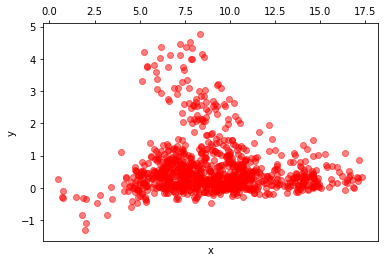

In [1068]:
all_samples= make_Metropolis_Samples()
# print(all_samples[0])
# print(all_samples[1])
print(type(all_samples))
xs = []
ys = []
for elem in all_samples:
    xs.append(elem[0])
    ys.append(elem[1])

plt.scatter(xs, ys, c='r', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Question 2 

Code based on https://gitlab.ecs.vuw.ac.nz/lms/comp471/probabilistic_machine_learning_2020/-/blob/master/notebooks/markov-messages.ipynb
(The code is demostrating a mc, where we need to modifiy it to make it become HMM. )


<font size="3.5">
The code is modified based on markov-message.ipynb.<br>
The third block, ns_h is the number of states for each time step in the hidden chain. nt =20 is the length of time steps. ns_o is the number of possible states for the observations. By default it can have three observation states and 4 hidden states. <br>
In this hmm model, a Emission matrix is added(E). <br>
I changed the usage of onehot encoding function, it was use for the chain. In this HMM model, it is used for observation states. <br>
For the time step has observations, the msg to factor become E.T*onehot(obs[t],ns_o).sum(1).reshape(ns_h), which use the emission matrix to reverse the message from observation state back to the hidden chain. <br>
The result looks correct, I did the checking by hand as well, please check the graph uploaded.
</font>

<font size='3.5'>
About the result:<br> 
The density concentrate on the state at the time step which has observation. For example we take # obs ={0:0, 9:2}
The observation of time step 9 is 2, and most density concentrate on C. If a long chain without any observations, the density of each state is close to the transition matrix.
   </font>

In [1200]:
%matplotlib inline
%reset -f
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2)
# I want tick labels at the top, like in lectures
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
matplotlib.rcParams['figure.dpi'] = 120
# rng.seed(471)

In [1201]:
def onehot(j,n):#use for y which is the observation for hmm
    # returns a one-hot vector of size n.
    z = np.zeros(n)
    z[j]=1
    return(z)

In [1202]:
ns_h=4 # has ns_h entries for hidden chain
ns_o=3 #has ns_o entries for observation
nt= 20 # this is the length of the sequence (time steps )
import string
stateNames = string.ascii_uppercase[:ns_h]
stateNames_y = string.ascii_lowercase[:ns_o]

# Make up a prior for the initial state. I call this M0
M0 = rng.random(ns_h)#state transition matrix
# M0 = np.array([[1,1,1,1]])
M0 = M0/M0.sum(0)
#make up a prior for the initial state for y called by E0
E0 = rng.random(ns_o)#emission probability matrix

# Make up a transition matrix. Some examples might be commented out here.
# M = np.array([[.9,0,.1],[.1,.9,0],[0,.1,.9]])   # a slow rock-paper-scissors cycle!
# M = np.array([[.1,0,.5],[.9,.1,0],[0,.9,.5]])   # same, but faster, and 2-->0 is slower.
# M = np.array([[0.05,0.8,0.15],[0.1,0.2,0.7],[0.8,0.1,0.1]])


E = rng.random((ns_o,ns_h))
# M = rng.random((ns_h,ns_h))  # totally made-up transition matrix
# E =np.array([[.9,0,.1],[.1,.9,0],[0,.1,.3],[0.6,0.1,0.3]])

E =np.array([[0.1,0.8,0.05,0.05],[0.1,0.2,0.5,0.2],[0.2,0.3,0.2,0.3]])
M = np.array([[0.05,0.7,0.1,0.15],[0.1,0.2,0.6,0.1],[0.05,0.1,0.05,0.8],[0.7,0.1,0.1,0.1]])


# 

M = M / M.sum(0) # just to be sure it's normalised down the cols.
E = E/ E.sum(0)
M0

array([0.49, 0.04, 0.06, 0.41])

array([[0.25, 0.62, 0.07, 0.09],
       [0.25, 0.15, 0.67, 0.36],
       [0.5 , 0.23, 0.27, 0.55]])

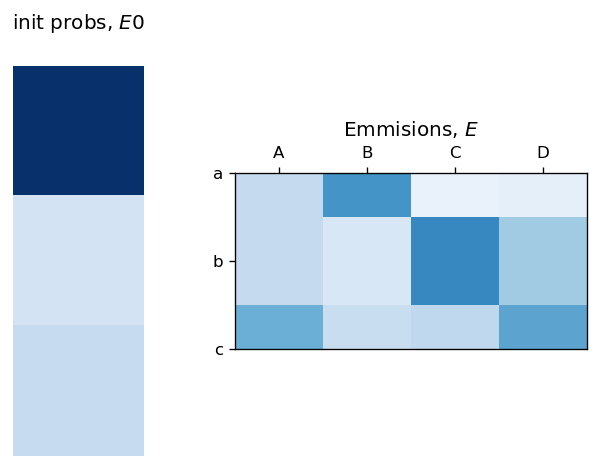

In [1203]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(E0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $E0$'); ax[0].axis('off')
ax[1].imshow(E, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'Emmisions, $E$')
dum = plt.setp(ax[1], xticks=range(ns_h), xticklabels=stateNames, yticks=range(ns_o), yticklabels=stateNames_y)
plt.tight_layout()
E

But the states of x are hidden here is just a demonstration of x (imagine we cant see it)

array([[0.06, 0.64, 0.12, 0.13],
       [0.11, 0.18, 0.71, 0.09],
       [0.06, 0.09, 0.06, 0.7 ],
       [0.78, 0.09, 0.12, 0.09]])

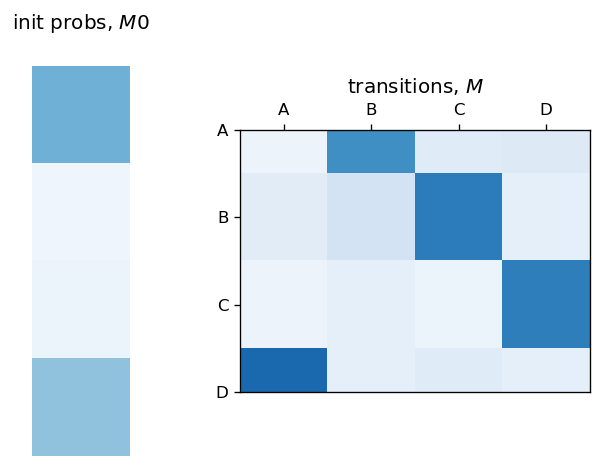

In [1204]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(M0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $M0$'); ax[0].axis('off')
ax[1].imshow(M, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'transitions, $M$')
dum = plt.setp(ax[1], xticks=range(ns_h), xticklabels=stateNames, yticks=range(ns_h), yticklabels=stateNames)
plt.tight_layout()
M

In [1205]:
no_obs = 5
obs={} # now the observation become y instead of x 
for i in range(no_obs): 
    obs[rng.randint(nt)] = rng.randint(ns_o)

# OR INSTEAD, FOR TESTING, let's just ordain the first and last states.    
# obs ={0:0, 9:2}

print(obs)

{15: 0, 10: 0, 1: 2, 17: 1}


In [1206]:
 # messages going from vars to factors...   # here is still MM
msg_forw_to_factor = np.zeros((ns_h,nt))  # 'D' for msg heading Down-stream
msg_back_to_factor = np.zeros((ns_h,nt))  # 'U' for msg heading Up-stream

# messages going from factors to vars...
msg_forw_to_var = np.zeros((ns_h,nt))  
msg_back_to_var = np.zeros((ns_h,nt))  

# messages going from y to factors
msg_y_to_factor = np.zeros((ns_h,nt))  
# messages from factor on y side to var
msg_yfactor_to_var = np.zeros((ns_h,nt)) ## just E matrix

print(M0)

[0.49 0.04 0.06 0.41]


In [1207]:
for t in range(nt):
    # first we do the message leaving the var node, going forwards / downstream
    if t==0:
        # special case because has it's very own factor
        msg_forw_to_var[:,t] = M0 # nb. does not matter, but anyway!
    else:
        upstream_msg = msg_forw_to_factor[:,t-1]
        msg_forw_to_var[:,t] = (M * upstream_msg).sum(1).reshape(ns_h)        
        # Note that all factor nodes are the same, namely the matrix of conditional probs, `M'
        # nb. numpy is automatically doing the "tiling" of the FROM msg into the shape of M, here.
    

    if t in obs: # there's an observation - this beats any inference guesswork!
#         msg_y_to_factor[:,t] =  (E.T * onehot(obs[t],ns_o)).sum(1).reshape(ns_h)
#         msg_y_to_factor[:,t] = onehot(obs[t],ns_o)

#         msg_forw_to_factor[:,t] =   msg_y_to_factor[:,t] # the observed value, one-hot encoded
#         msg_yfactor_to_var[:,t] = (E.T * msg_y_to_factor[:,t]).sum(1).reshape(ns_h)
#         msg_forw_to_var[:,t] = msg_y_to_factor[:,t]
#         print("*"*40)
#         print(E)
#         print("+"*40)
#         print(E.T)
        p = (E.T*onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
#         print(p)
        msg_forw_to_factor[:,t] = ( E.T * onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
        m=onehot(obs[t],ns_o)
    else:
        msg_forw_to_factor[:,t] = msg_forw_to_var[:,t] # default is it goes straight through the variable node.
#     if t==3:
#         p = msg_forw_to_var[:,t]
#         p= p/ p.sum(0)
#         print(p)
        


In [1208]:
# M just used for checking 
# p0 =M0
# p00 = np.array([[0.25,0.62,0.07,0.09]])
# p = (p00.T * p0).sum(1).reshape(ns_h)
# for i in range(3):
#     upstream_msg = p
#     p = (M * upstream_msg).sum(1).reshape(ns_h)  
#     p=p/p.sum(0)
# # (M * upstream_msg).sum(1).reshape(ns_h)   
# print(p)    

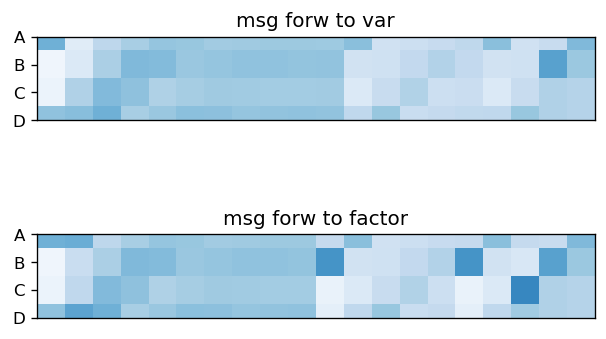

In [1209]:
 fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(msg_forw_to_var, cmap='Blues', vmin=0,vmax=1)
dum = ax1.set_title('msg forw to var')
ax2.imshow(msg_forw_to_factor, cmap='Blues', vmin=0,vmax=1)
dum = ax2.set_title('msg forw to factor')
dum = plt.setp((ax1,ax2), xticks=[], yticks=range(ns_h), yticklabels=stateNames)

In [1210]:
for t in reversed(range(nt)):
    if t == nt-1: # last one is special case: incoming back msg is just a dummy vector of ones.
        msg_back_to_var[:,t] = np.ones(ns_h)/ns_h
    else:
        upstream_msg = msg_back_to_factor[:,t+1]
        msg_back_to_var[:,t] = (M.T * upstream_msg).sum(1).reshape(ns_h)    
    
    if t in obs: # there's an observation - this beats any inference guesswork!
        msg_back_to_factor[:,t] = (E.T* onehot(obs[t],ns_o).T).sum(1).reshape(ns_h) # the observed value, one-hot encoded
    else:
        msg_back_to_factor[:,t] = msg_back_to_var[:,t] # default is it goes straight through the variable node.

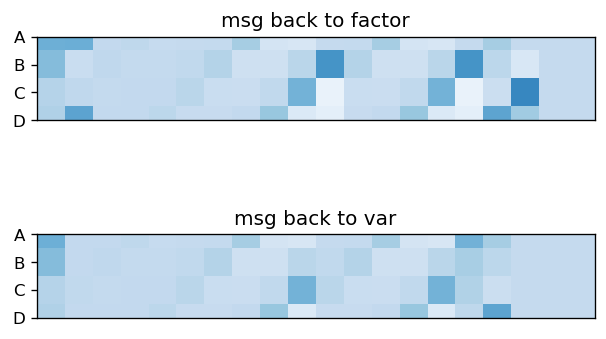

In [1211]:
 fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.imshow(msg_back_to_factor, cmap='Blues', vmin=0,vmax=1)
dum = ax1.set_title('msg back to factor')
ax2.imshow(msg_back_to_var, cmap='Blues', vmin=0,vmax=1)
dum = ax2.set_title('msg back to var')
dum = plt.setp((ax1,ax2), xticks=[], yticks=range(ns_h), yticklabels=stateNames)

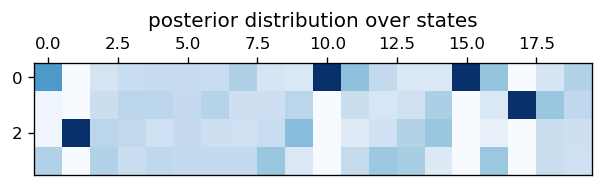

In [1212]:
 px = np.zeros((ns_h,nt))
px =  msg_forw_to_var * msg_back_to_var
for t in obs: px[:,t] = onehot(obs[t],ns_h)
    
px = px / px.sum(0)
fig, ax = plt.subplots(1,1)
ax.imshow(px, cmap='Blues', vmin=0,vmax=1)
dum = ax.set_title('posterior distribution over states')

## Gibbs Sampling:


In [1213]:
%reset -f
%matplotlib inline
import matplotlib as mpl
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2, suppress = True)
import time
rng.seed(int(time.time())) # seed the random number generator

### Initialise each state with onehot encoding, if is for initialising then, it will initialise the whole chain with probability for A,B,C in M0

In [1214]:
def onehot(n,intial=False):#use for initialising the states at the begining 
    z = np.zeros(n)
    if intial:
#         print("Using the initla M0 distribution to intialise the whole chain :", M0)
        K = M0.tolist()
        r = rng.random()
        if(r<K[0]):
            z[0]=1
        elif(r< (K[0]+K[1])):
            z[1]=1
        else:
            z[2]=1
    else :
        j = rng.randint(n) 
        z[j]=1
    return(z)

In [1215]:
def targPrb(x):#just used for initialising 
    if x[0] == 1 and x[1]==0 and x[2]==0 : ## here the state is A
        targPrb = M0[0]
    elif x[0] == 0 and x[1]== 1 and x[2]==0 : ## here the state is B
        targPrb = M0[1]
    elif x[0] == 0 and x[1]== 0 and x[2]==1 : ## here the state is C
        targPrb = M0[2]
    return targPrb

The below function will accept a state vector e.g.(1,0,0) and return the probability vector of change to other states (a column of transistion matrix)

In [1216]:
def transitionProb(v):#return a vector of transition probability to other states
    if v[0] == 1 and v[1]==0 and v[2]==0 : ## here the state is A
        transPrb = M[:,0].T
    elif v[0] == 0 and v[1]== 1 and v[2]==0 : ## here the state is B
        transPrb = M[:,1].T
    elif v[0] == 0 and v[1]== 0 and v[2]==1 : ## here the state is C
        transPrb = M[:,2].T
    else:
        raise Exception("Something wrong with the vector of the state") 
#     print(transPrb)
    return transPrb
    

In [1217]:
def logProb(toState,fromState):
    if M[toState][fromState] == 0:
        raise Exception ("zero probability occurs")
    logProb = np.log(M[toState][fromState])
    
    return logProb
    

### the code below is to construct input pattern and make the transiction matrix fits.

In [1218]:
dimensionNo = 20 # so we have 20 dimensions by default
burninPeriod = 100 #burn in period withou taking samples from 
# M = np.array([[.1,0,.5],[.9,.1,0],[0,.9,.5]]) 
M = np.array([[0.05,0.8,0.15],[0.1,0.9,0.7],[0.8,0.1,0.1]])


M = M / M.sum(0) # just to be sure it's normalised down the cols.
M0 = rng.random(3)#initial state for each time step , can I use it for all the time step for initialising? (for the probability of each time step?)
M #the probability of each state is the transaction matrix in the previous problem 
# print(M)
# print(M0)
N = 3 # the dimension of input patterns is 3 "A(1,0,0), B(0,1,0), C(0,0,1)"
# gapInBetw = 20 # the gaps between samples
targProb = {}  # these are going to be dictionaries.
testVal = 1.0
inpats = [] # input patterns should be []


# for p in [[0 if (i & (1 << bit) == 0) else 1 for bit in range(N)] for i in range(2**N)]:
# #     print(type(p))
#     inpats.append(p)
#     targProb[tuple(p)] = testVal
#     testVal *= 2

for i in range(20):#20 -> number of time steps (initialise each state)
    x = onehot(3,True)
    p = x.tolist()
    inpats.append(p)
    targProb[tuple(p)] = targPrb(x)



# c =0
# for p in inpats:
#     c=c+1
#     print("This is time step : ", c)
#     print ("%s  target probability is %.3f" % (p, targProb[tuple(p)]))


In [1219]:
def writelog():
    print(len(update_log))
    f=open('updatelog.txt','w')
    for ele in update_log:
        f.write(ele+'\n')
    f.close()
    print("wrote the changes to a log file ")

## Gibbs sampler
<font size='3.5'>
Based on the code simplest demo logspace,
it was only two states 0 and 1, <br>
here I chanhed it to three which are a,b and c <br>
Then compare the log probability to decide if update the chosen dimension or not.<br>

I realize I made a mistake for this question, it should check for the 4dimensional hmm model. Because at the begining I implement the HMM with 3 possible hidden states, so for this question, it is acutally checking for the 3 dimensional version HMM.<br>
</font>

In [1220]:
ITERATIONS = 100000
update_log=[]
gap = 100

burninPeriod = 1000 #burn in period withou taking samples from 



counter = [] ## construct by two list, the first list tracking the index of state,
count_abc=[0,0,0]## inner list counts the number of this state become A,B and C 
for i in range(20):
    counter.append(list(count_abc))
# print(inpats)

updateCounts = 0
for i in range(ITERATIONS):
    index = rng.randint(20)  # choose one dimension, whose value we will reset
#     print(inpats[index])
    current_stateVec = inpats[index]#the current state of the chosen dimension
    probVec = transitionProb(current_stateVec)# the probability of the current state transform to other (A,B,C)
#     print(probVec)#check 
    fromState = -1
    if current_stateVec[0]==1:
        fromState =0
    elif current_stateVec[1]==1:
        fromState =1
    else:
        fromState =2
    logProb_toA = logProb(toState=0, fromState = fromState)
    logProb_toB = logProb(toState=1, fromState = fromState)
    logProb_toC = logProb(toState=2, fromState = fromState)
    r0 = sigmoid(logProb_toA-logProb_toB)
    r1 = sigmoid(logProb_toA-logProb_toC)
    r2 = sigmoid(logProb_toB-logProb_toC)


##updating: 
    r = rng.rand()
    if fromState==0:
        if r<r1:#change to B
#             print("updating here: ", index, " before update: ", inpats[index], " become : 010")
            inpats[index] = [0,1,0]
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 0,1,0"))
            if i> burninPeriod and i%gap==0:#dont take any samples during burn in period
                counter[index][1]+=1
                updateCounts+=1


        elif r<r2: #change to C
#             print("updating here: ", index, " before update: ", inpats[index], " become : 001")
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 0,0,1"))
            inpats[index] = [0,0,1]
            if i> burninPeriod and i%gap==0:
                counter[index][2]+=1
                updateCounts+=1


        else:
            inpats[index] = [1,0,0]#unchanged stay A
    elif fromState==1:#currently B 
        if r<r0:#change to A
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 1,0,0"))


#             print("updating here: ", index, " before update: ", inpats[index], " become : 100")
            inpats[index] = [1,0,0]
            if i> burninPeriod and i%gap==0:
                counter[index][0]+=1
                updateCounts+=1


                
        elif r<r2: #change to C
#             print("updating here: ", index, " before update: ", inpats[index], " become : 001")
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 0,0,1"))
            inpats[index] = [0,0,1]
            if i> burninPeriod and i%gap==0:
                counter[index][2]+=1
                updateCounts+=1


                
    else: ##currently C
        if r<r0:#change to A
#             print("updating here: ", index, " before update: ", inpats[index], " become : 100")
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 1,0,0"))
            inpats[index] = [1,0,0]
            if i> burninPeriod and i%gap==0:
                counter[index][0]+=1
                updateCounts+=1


                
        if r<r1:#change to B
#             print("updating here: ", index, " before update: ", inpats[index], " become : 010")
            update_log.append(str("In iteration : " + str(i)+ "the "+str(index)+" state is updated. "+ " before update: "+ str(inpats[index])+ " become : 0,1,0"))
            inpats[index] = [0,1,0]
            if i> burninPeriod and i%gap==0:
                counter[index][1]+=1
                updateCounts+=1


print("In ", ITERATIONS," iterations the total number of updates is : ", updateCounts )#wanna see how many updates in the total iterations
# writelog() # for writting all the updates to a text file named by updatelog




In  100000  iterations the total number of updates is :  370


--------------------------------------------------------------------------------
[0.29 0.29 0.38 0.54 0.33 0.35 0.29 0.3  0.32 0.18 0.15 0.41 0.29 0.47
 0.23 0.47 0.4  0.22 0.28 0.33]
--------------------------------------------------------------------------------
[0.43 0.38 0.24 0.23 0.4  0.48 0.53 0.3  0.41 0.64 0.38 0.35 0.24 0.2
 0.46 0.29 0.47 0.33 0.56 0.33]
--------------------------------------------------------------------------------
[0.29 0.33 0.38 0.23 0.27 0.17 0.18 0.4  0.27 0.18 0.46 0.24 0.47 0.33
 0.31 0.24 0.13 0.44 0.17 0.33]


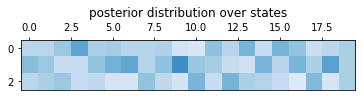

In [451]:
px = np.zeros((20,3))


divider = []
for i in range(20):
    divider = sum(counter[i])
    for j in range(3):
        px[i][j] = counter[i][j]/divider
px = px.T
for m in range(3):
    print("--"*40)
    print(px[m])
# px = px /px.sum(0)

fig, ax = plt.subplots(1,1)
ax.imshow(px, cmap='Blues', vmin=0,vmax=1)
dum = ax.set_title('posterior distribution over states')

<font size="3.5">
For Gibbs Sampling, the result is not close to what I got from previous question. <br>
For this question, it is 20 dimensions as I created a 20 states chain. Intialise the chain based on the probability of A,B and C using M0 from the previous question.  In this question A is represented by (1,0,0) B->(0,1,0) C->(0,0,1) (onehot encoding)<br>
Then start iterations(Set to 10000) <br>
in each iteration, use random(20) to chose which dimension to update.  <br>
Then use the transiction matrix which is the same as question 2. for each state check the current value(A,B or C)
Take log value of for probabily of changing to each state(get problogA,probLogB and problogC), then r0 =sigmoid(problogA-problogB) similar for r2 and r3.<br>
if $r=random()<r0$ then change the current state to A similarly for r1 and r2.(But only check two of them for each state if current is A then just check B and C) if non of them been accepted then remain the current state. If the changes been accepted then increase the counter for this state with changes value.(have two counter the outer track the index of state the inner counter counts the number of pointing state store this specific value)
During burnin Period the updating process still working but without taking any samples.  <br>
And take samples for each 20 points after burn in.<br>
Sometime the results are quite close actually, but I think that's probabbly just lucky?
I expected the result are close, because they actually using the same transistion matrix to update states.<br>
I think the difference may comes by gibbs sampling randomly choose which state to update, but hmm updates the whole chain in order. The other thing may make differnce is hmm-mcmc updating the current state based on the observations and all the other states but the gibbs sampling I implemented update the current state of the preious value of this state(the same node).


</font>

### Question 4

<font size='3.5'>
For the first part, the length of sequence set to 8. Each node on the chain can have 7 possible states using discrete numnbers(represent by ABCDE), each of the number have several prefered letters. The transition matrix includes the possibility of moving to insertion and deletion. The observations are the letters which means it can have 26 possibile states.(later on it can have more states for symbols, but I feel like I dont have enough time for pushing more on that if I did you wont see this line here :) ).<br>
The structer I used is similar to the one shows in the book by Murphy.<br> Also did a bad hand writing graph, I will submit as well.<br>
For the very first part, the code for observation actually does not involved. The code just want to generate samples from the given matrixs.<br>
For given some letters and insert the rest, then observation part start working.<br>
</font>





So sorry, I didnt make the code for this part fully working, cuz the time limit. 

In [1255]:
%matplotlib inline
%reset -f
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2)
# I want tick labels at the top, like in lectures
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
matplotlib.rcParams['figure.dpi'] = 120


In [1256]:
def onehot(j,n):#use for y which is the observation for hmm
    # returns a one-hot vector of size n.
    z = np.zeros(n)
    z[j]=1
    return(z)

In [1320]:
ns_h=7# has ns_h entries for hidden chain 
ns_o=26 #has ns_o entries for observation
nt= 8 # this is the length of the sequence 
ns_i =26
import string
stateNames = string.ascii_uppercase[:ns_h]
stateNames_y = string.ascii_lowercase[:ns_o]
stateNames_i = string.ascii_lowercase[:ns_i]

# Make up a prior for the initial state. I call this M0
M0 = rng.random(ns_h)#state transition matrix


# Make up a transition matrix. Some examples might be commented out here.
# M = np.array([[.9,0,.1],[.1,.9,0],[0,.1,.9]])   # a slow rock-paper-scissors cycle!
# M = np.array([[.1,0,.5],[.9,.1,0],[0,.9,.5]])   # same, but faster, and 2-->0 is slower.
# M = np.array([[0.05,0.8,0.15],[0.1,0.2,0.7],[0.8,0.1,0.1]])

E0 = rng.random(ns_o)#emission probability matrix
I = rng.random((ns_i))
# E = rng.random((ns_o,ns_h-2))
# M = rng.random((ns_h,ns_h))  # totally made-up transition matrix


M = np.array([[0.05,0.8,0.05,0.05,0.05,0.05,0.05], ## used for produce Vincent (from A to E slowly)
              [0.05,0.05,0.8,0.05,0.05,0.05,0.05],
              [0.05,0.05,0.05,0.8,0.05,0.05,0.05],
              [0.05,0.05,0.05,0.05,0.8,0.05,0.05],
              [0.05,0.05,0.05,0.05,0.05,0.8,0.05],
              [0.05,0.05,0.05,0.05,0.05,0.05,0.8],
              [0.8,0.05,0.05,0.05,0.05,0.05,0.05]])
M = M / M.sum(0)
# E = np.array([[0.001,0.001,0.01,0.01,0.01]])
             
E = np.zeros((26,7))
E = np.array([[0., 0., 0., 0., 0., 0., 0.], ## sorry for the mess here, just wanna do printing my name so make up the emission matrix
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0.]])
for i in range(26):
    for j in range(7):
        E[i][j]=0.05
E[21][0]=0.8
E[8][1] = 0.8
E[13][2]= 0.8
E[2][3] =0.8
E[4][4]=0.8 
E[13][5] =0.8
E[19][6] = 0.8
E = E/E.sum(0)


# M = M / M.sum(0) # just to be sure it's normalised down the cols.
# E = E/ E.sum(0)
# M0 = M0/M0.sum(0)
M0 = [1,0,0,0,0,0,0]

In [1321]:
# fig, ax= plt.subplots(1,2)
# ax[0].imshow(np.atleast_2d(E0).T, cmap='Blues', vmin=0,vmax=1)
# ax[0].set_title(r'init probs, $E0$'); ax[0].axis('off')
# ax[1].imshow(I, cmap='Blues', vmin=0,vmax=1)
# dum = ax[1].set_title(r'Emmisions, $E$')
# dum = plt.setp(ax[1], xticks=range(2), xticklabels=stateNames, yticks=range(26), yticklabels=stateNames_y)
# plt.tight_layout()


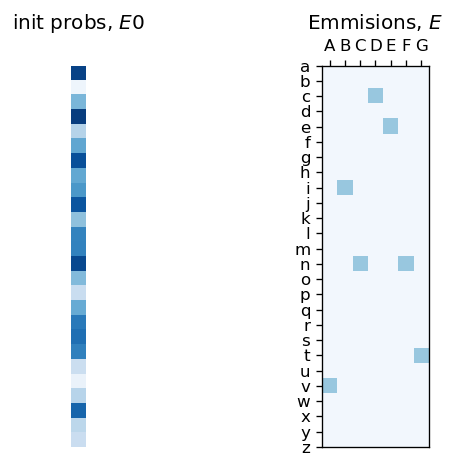

In [1322]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(E0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $E0$'); ax[0].axis('off')
ax[1].imshow(E, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'Emmisions, $E$')
dum = plt.setp(ax[1], xticks=range(ns_h), xticklabels=stateNames, yticks=range(ns_o), yticklabels=stateNames_y)
plt.tight_layout()


array([[0.05, 0.73, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.73, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.73, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.73, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05, 0.73, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.73],
       [0.73, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]])

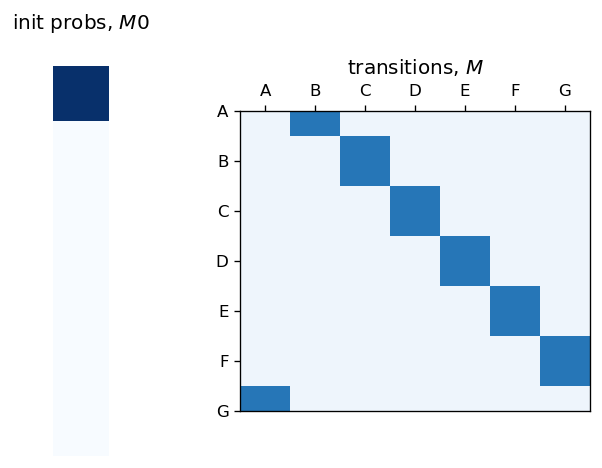

In [1323]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(M0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $M0$'); ax[0].axis('off')
ax[1].imshow(M, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'transitions, $M$')
dum = plt.setp(ax[1], xticks=range(ns_h), xticklabels=stateNames, yticks=range(ns_h), yticklabels=stateNames)
plt.tight_layout()
M

In [1324]:
# no_obs = 5
# obs={} # now the observation become y instead of x 
# for i in range(no_obs): 
#     obs[rng.randint(nt)] = rng.randint(ns_o)

# # OR INSTEAD, FOR TESTING, let's just ordain the first and last states.    
# # obs ={0:0, 9:2}

# print(obs)

In [1336]:
maxSqeuence =100
msg_forw_to_factor = np.zeros((ns_h,maxSqeuence))  # 'D' for msg heading Down-stream
msg_back_to_factor = np.zeros((ns_h,maxSqeuence))  # 'U' for msg heading Up-stream

# messages going from factors to vars...
msg_forw_to_var = np.zeros((ns_h,maxSqeuence))  
msg_back_to_var = np.zeros((ns_h,maxSqeuence))  

# messages going from y to factors
msg_y_to_factor = np.zeros((ns_h,maxSqeuence))  
# messages from factor on y side to var
msg_yfactor_to_var = np.zeros((ns_h,maxSqeuence)) ## just E matrix
samples = []#samples made

In [1337]:
def takeSamplesOnChain(v):
    samples.append(0)
    



In [1338]:
## sampling here 

notEnd = True# check if the sequence end
delt = False # if the previous time step enter deletion
inst = False # if the previous time step enter insertion
r_delt = 0.1
r_inst = 0.2
t =0 #tracking time step

while(notEnd):## if not reach the end node then keep iterating
    if t==0:# special case because has it's very own factor
        msg_forw_to_var[:,t] = M0 # nb. does not matter, but anyway!
    else:
        if delt or inst:
                if delt:
                        if r_delt < rng.random(): # get out of deletion
                            delt=False # leaved deletion
                            pass # dont take any sample and enter the next iteration
                        
                        else:
                            print("out deletion")
                else: # in insertion 
                        if r_inst < rng.random():# leave insertion
                            t+=1
                            inst = False #left insertion
                            pass # goes into the next iteration (t+1)
                        else:#still in insertion 
#                             samples.append()
                            takingSampleForInsert()
                        #trigger a letter and take the sample using I matrix
                            
        else:  # the previous node is on the chain and proceed the sample process
            r = rng.random() # used to decide if goes into insertion or deletion
            if r <0.3:#jumps into deletion or insertion
                if r<0.1:#goes into deletion
                    delt=True
                else:
                    inst =True
                    takingSampleForInsert()# trig taking samples
                    
                
            upstream_msg = msg_forw_to_factor[:,t-1]
            msg_forw_to_var[:,t] = (M * upstream_msg).sum(1).reshape(ns_h)
            takeSamplesOnChain(msg_forw_to_var[:,t])

            if t in obs: # there's an observation - this beats any inference guesswork!
                    p = (E.T*onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
#         print(p)
                    msg_forw_to_factor[:,t] = ( E.T * onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
                    m=onehot(obs[t],ns_o)
            else:
                    msg_forw_to_factor[:,t] = msg_forw_to_var[:,t] # default is it goes straight through the variable node.


    if(t==nt): 
        notEnd =False ## the sequence is ended
    t+=1 #change the time step


# print(samples)

In [1339]:
def takingSampleForInsert():
    print(I)

In [1328]:
for t in range(nt):
    # first we do the message leaving the var node, going forwards / downstream
    if t==0:
        # special case because has it's very own factor
        msg_forw_to_var[:,t] = M0 # nb. does not matter, but anyway!
    else:
        upstream_msg = msg_forw_to_factor[:,t-1]
        msg_forw_to_var[:,t] = (M * upstream_msg).sum(1).reshape(ns_h)        

    if t in obs: # there's an observation - this beats any inference guesswork!
        p = (E.T*onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
#         print(p)
        msg_forw_to_factor[:,t] = ( E.T * onehot(obs[t],ns_o).T).sum(1).reshape(ns_h)
        m=onehot(obs[t],ns_o)
    else:
        msg_forw_to_factor[:,t] = msg_forw_to_var[:,t] # default is it goes straight through the variable node.
#     if t==3:
#         p = msg_forw_to_var[:,t]
#         p= p/ p.sum(0)
#         print(p)

In [1234]:
# for t in reversed(range(nt)):
#     if t == nt-1: # last one is special case: incoming back msg is just a dummy vector of ones.
#         msg_back_to_var[:,t] = np.ones(ns_h)/ns_h
#     else:
#         upstream_msg = msg_back_to_factor[:,t+1]
#         msg_back_to_var[:,t] = (M.T * upstream_msg).sum(1).reshape(ns_h)    
    
#     if t in obs: # there's an observation - this beats any inference guesswork!
#         msg_back_to_factor[:,t] = (E.T* onehot(obs[t],ns_o).T).sum(1).reshape(ns_h) # the observed value, one-hot encoded
#     else:
#         msg_back_to_factor[:,t] = msg_back_to_var[:,t] # default is it goes straight through the variable node.

Sorry, I dont have enought time to try on EM, I just realized is over the due time :(. But I think I should put down the thought about how I would use EM on my model.<br>
So for using EM, first collect some strings as what you described in the tutorial. Then I would set each letter in the string as observations in order to train the Emission and transistion.<br>
Then need to train the rate for insertion and deletion. So put the transistions and emission as fixed.<br>
And use the same strings to train the distribution for letters of insertion matrix.<br>
And I think the rate of insertion and deletion should also be trained, it should not just be fixed probabilities.<br>
If this idea is correct, I think this kind of models are correct, if we feeding the models with something like maybe news, it can generate fake news by it self? <br>

Again sorry about disappointing you for looking through codes but it did not work properly. I spent like 3 or 4 days on this assignment, but ehhhh still did not make all them work properly. 
